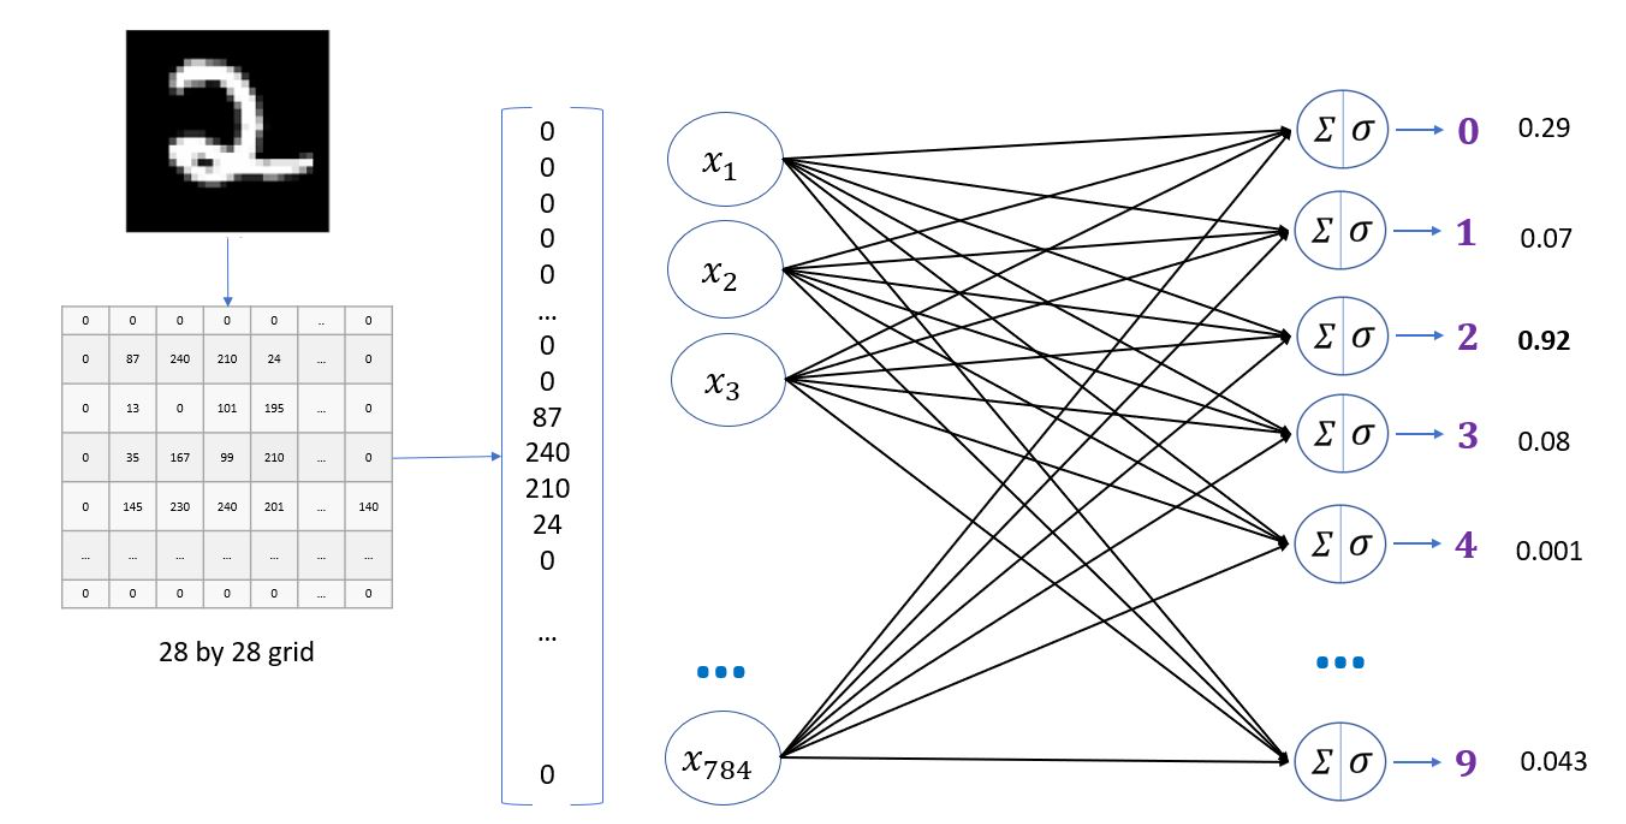

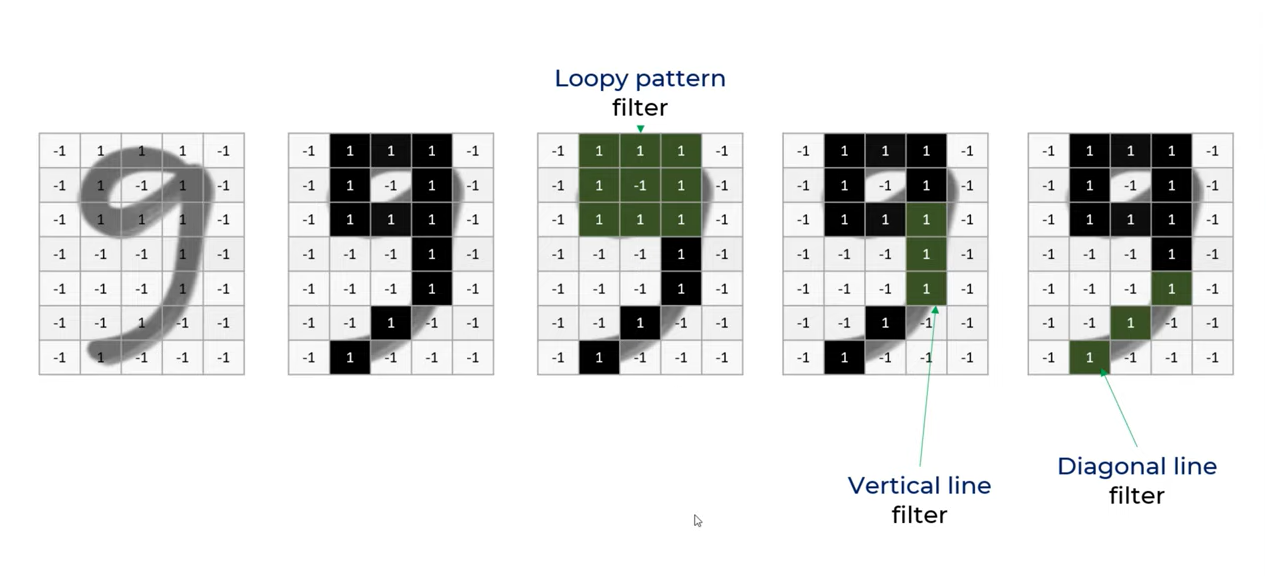

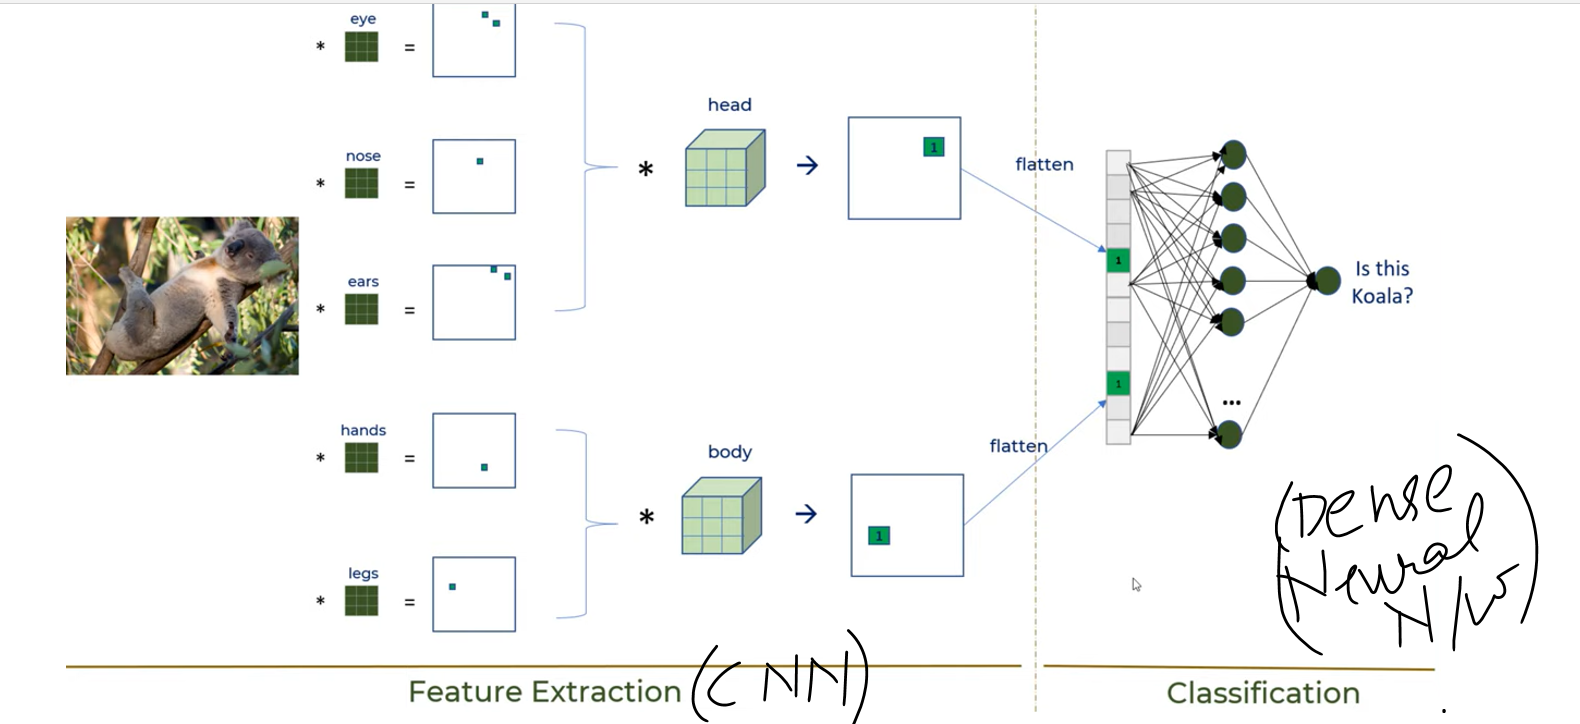

argmax is a function which gives the index of the greatest number in the given row or column and the row or column can be decided using axis attribute of argmax funcion. If we give axis=0 then it will give the index from columns and if we give axis=1 then it will give the index from rows.

argmax will give index of the output neuron which is having highest value-->which is the output

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 4s 0us/step


In [3]:
len(X_train)

60000

In [4]:
X_train[0].shape

(28, 28)

In [20]:
len(X_test)

10000

4

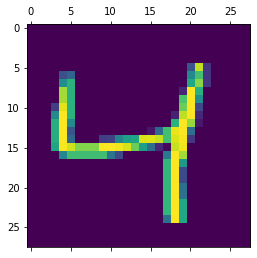

In [22]:
plt.matshow(X_train[2])

y_train[2]

In [9]:
#we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1.
#We can do this by dividing each value in the training and testing sets by 255.0.
#We do this because smaller values will make it easier for the model to process our values.

#scaling the data
X_train = X_train / 255
X_test = X_test / 255

In [11]:
#Flattening is converting the data into a 1-dimensional array for inputting it to the next layer.
#We flatten the output of the convolutional layers to create a single long feature vector. 
#And it is connected to the final classification model, which is called a fully-connected layer.

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

X_train_flattened.shape

(60000, 784)

In [12]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
#creating a neural networkwith 784 input and 10output layer 
#dense layer means all the neurons are connected to all the output layer


#defining neural network
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

#compiling the neural network and give the optimiser,metrics and loss
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#fitting the train data with the model designed
model.fit(X_train_flattened, y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 1s 655us/step - loss: 0.4703 - accuracy: 0.8774
Epoch 2/6
1875/1875 [==============================] - 1s 571us/step - loss: 0.3036 - accuracy: 0.9153
Epoch 3/6
1875/1875 [==============================] - 1s 568us/step - loss: 0.2836 - accuracy: 0.9204
Epoch 4/6
1875/1875 [==============================] - 1s 566us/step - loss: 0.2731 - accuracy: 0.9237
Epoch 5/6
1875/1875 [==============================] - 1s 570us/step - loss: 0.2666 - accuracy: 0.9257
Epoch 6/6
1875/1875 [==============================] - 1s 569us/step - loss: 0.2620 - accuracy: 0.9269


In [14]:
#evaluating the model
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 496us/step - loss: 0.2713 - accuracy: 0.9242


[0.27134859561920166, 0.9241999983787537]

In [15]:
#Predicting the test data
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.51019895e-02, 2.85234051e-07, 4.43927944e-02, 9.59779382e-01,
       2.44697928e-03, 1.07999206e-01, 9.30386477e-07, 9.99713480e-01,
       6.95484877e-02, 6.01724148e-01], dtype=float32)

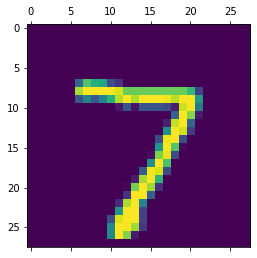

In [16]:
plt.matshow(X_test[0])

In [17]:
np.argmax(y_predicted[0])

7

In [19]:
#y_predeicted is in form of e which needs to be converted
y_predicted_labels = [np.argmax(i) for i in y_predicted]

#confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    2,    0,    4,    2,    1,    1,    0],
       [   0, 1109,    3,    2,    0,    2,    4,    2,   13,    0],
       [  10,    9,  908,   27,    9,    2,   12,   10,   42,    3],
       [   3,    0,   12,  929,    1,   23,    2,   11,   24,    5],
       [   2,    1,    4,    2,  924,    0,    9,    3,   11,   26],
       [  12,    1,    2,   39,    9,  777,   11,    4,   31,    6],
       [  15,    3,    4,    2,    8,   12,  910,    2,    2,    0],
       [   2,    5,   21,    6,    9,    0,    0,  950,    5,   30],
       [  11,    6,    5,   22,    9,   28,    8,   12,  867,    6],
       [  11,    6,    1,   12,   39,    8,    0,   27,    6,  899]])>

Text(69.0, 0.5, 'Truth')

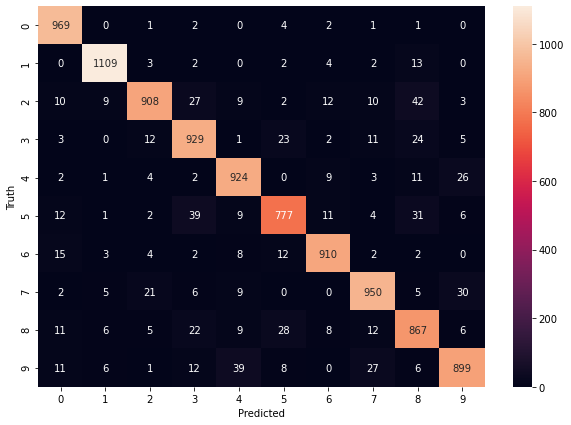

In [24]:

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Adding Hidden layer

In [25]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 870us/step - loss: 0.2751 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 2s 941us/step - loss: 0.1259 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0866 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 2s 864us/step - loss: 0.0660 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 2s 886us/step - loss: 0.0511 - accuracy: 0.9845


In [26]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 637us/step - loss: 0.0773 - accuracy: 0.9767


[0.07731934636831284, 0.9767000079154968]

Text(69.0, 0.5, 'Truth')

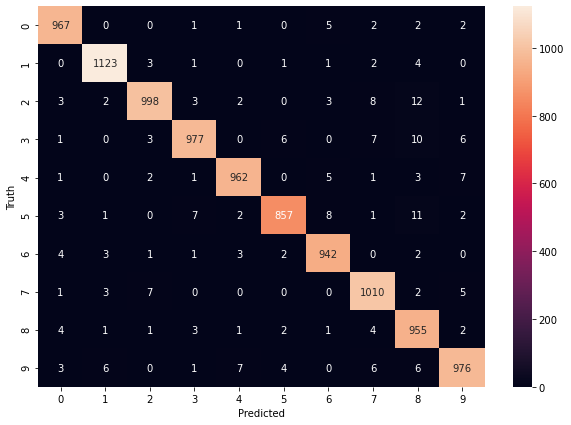

In [27]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Flatten layer so that we don't have to call .reshape on input dataset

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 890us/step - loss: 0.2737 - accuracy: 0.9219
Epoch 2/10
1875/1875 [==============================] - 2s 811us/step - loss: 0.1248 - accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 2s 809us/step - loss: 0.0875 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 2s 919us/step - loss: 0.0670 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 2s 823us/step - loss: 0.0524 - accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 2s 807us/step - loss: 0.0429 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 2s 803us/step - loss: 0.0347 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 2s 838us/step - loss: 0.0288 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 2s 822us/step - loss: 0.0239 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 2s 863u

In [29]:
#evaluating
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 585us/step - loss: 0.0900 - accuracy: 0.9746


[0.08999979496002197, 0.9746000170707703]